# Task 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
music_genre = pd.read_csv("../data/music_genre_preprocessed.csv")
music_genre.pop('Unnamed: 0')
music_genre.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,11,0.115,-5.201,0,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,3,0.124,-7.043,0,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,9,0.534,-4.617,1,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,2,0.157,-4.498,1,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,7,0.157,-6.266,1,0.0413,145.036,0.323,Electronic


In [3]:
music_genre_mapping = {
    "Electronic" :1,
    "Rap":2,
    "Classical" :3,
    "Rock":4,
    "Hip-Hop" :5,
    "Anime" :6,
    "Blues":7,
    "Country" :8,
    "Jazz":9,
    "Alternative" :10
}
music_genre['music_genre'] = music_genre['music_genre'].map(music_genre_mapping)

In [4]:
music_genre.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,44.220420,0.306383,0.558241,2.455035e+05,0.599755,0.181601,6.227220,0.193896,-9.133761,0.641980,0.093586,119.952961,0.456264,5.50000
std,15.542008,0.341340,0.178632,1.057864e+05,0.264559,0.325409,3.557668,0.161637,6.162990,0.479423,0.101373,29.075697,0.247119,2.87231
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,1.000000,0.009670,-47.046000,0.000000,0.022300,34.347000,0.000000,1.00000
25%,34.000000,0.020000,0.442000,1.948750e+05,0.433000,0.000000,3.000000,0.096900,-10.860000,0.000000,0.036100,96.775750,0.257000,3.00000
50%,45.000000,0.144000,0.568000,2.360270e+05,0.643000,0.000158,6.000000,0.126000,-7.276500,1.000000,0.048900,119.952961,0.448000,5.50000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,9.000000,0.244000,-5.173000,1.000000,0.098525,139.468250,0.648000,8.00000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,12.000000,1.000000,3.744000,1.000000,0.942000,220.276000,0.992000,10.00000


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

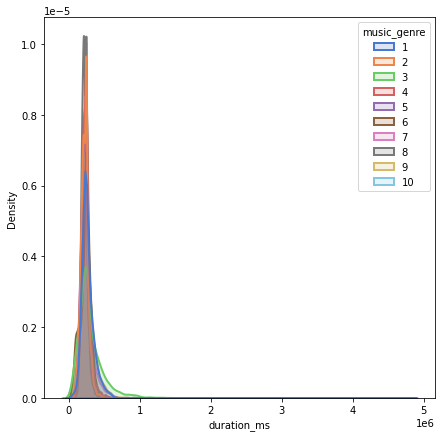

In [5]:
fig = plt.figure(figsize=(7, 7))
sns.kdeplot(
    data=music_genre, 
    x="duration_ms", 
    hue="music_genre", 
    fill=True, 
    common_norm=False, 
    palette="muted", 
    alpha=.20, 
    linewidth=2
)

В столбце duration_ms явные выбросы.
Уберем аномалии, пользуясь правилом трёх сигм.

In [6]:
outliner_columns = ['duration_ms']

In [7]:
for col in outliner_columns:
    # Первая и третья квантиль
    first_quartile = music_genre[col].describe()['25%']
    third_quartile = music_genre[col].describe()['75%']

    # Интерквантильный размах
    iqr = third_quartile - first_quartile

    # Убираем аномалии
    music_genre = music_genre[(music_genre[col] > (first_quartile - 3 * iqr)) & 
                              (music_genre[col] < (third_quartile + 3 * iqr))]

In [8]:
music_genre.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
count,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.000000,48845.00000
mean,44.473375,0.298855,0.562866,235305.670617,0.605645,0.172761,6.231917,0.193373,-8.962961,0.642604,0.094520,120.176546,0.461054,5.52511
std,15.502855,0.336454,0.175868,68421.011278,0.260898,0.319434,3.559544,0.159714,6.029477,0.479238,0.102156,29.087529,0.245644,2.87178
min,0.000000,0.000000,0.059600,15509.000000,0.000792,0.000000,1.000000,0.009670,-47.046000,0.000000,0.022300,34.347000,0.000000,1.00000
25%,34.000000,0.019400,0.449000,193980.000000,0.442000,0.000000,3.000000,0.097100,-10.628000,0.000000,0.036000,96.988000,0.265000,3.00000
50%,45.000000,0.139000,0.572000,234000.000000,0.648000,0.000119,6.000000,0.127000,-7.190000,1.000000,0.049200,119.952961,0.453000,6.00000
75%,56.000000,0.530000,0.689000,264031.000000,0.818000,0.115000,9.000000,0.244000,-5.132000,1.000000,0.101000,139.864000,0.652000,8.00000
max,99.000000,0.996000,0.986000,489763.000000,0.999000,0.996000,12.000000,1.000000,3.744000,1.000000,0.942000,220.276000,0.992000,10.00000


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

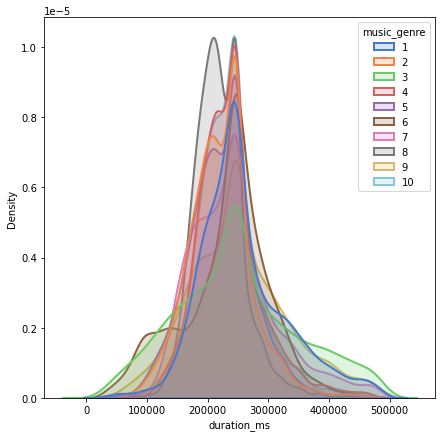

In [9]:
fig = plt.figure(figsize=(7, 7))
sns.kdeplot(
    data=music_genre, 
    x="duration_ms", 
    hue="music_genre", 
    fill=True, 
    common_norm=False, 
    palette="muted", 
    alpha=.20, 
    linewidth=2
)

In [10]:
# Возьмем только 5000 объектов из перемешанной выборки
music_genre = shuffle(music_genre, random_state=0)
music_genre = music_genre.iloc[:5000]
music_genre.reset_index(drop=True, inplace=True)

In [11]:
X = music_genre.drop(['music_genre'], 1)
y = music_genre['music_genre']

In [12]:
# Разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Алгоритмы KNN и SVM требуют масштабирования признаков, стандартизируем данные.

In [13]:
# Масштабируем признаки
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# KNN (k Nearest Neighbor)

In [19]:
parameters = {'n_neighbors':[3, 4, 5, 6, 7]}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'n_neighbors': 6}

In [20]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 78   7   1   6   5  11   9  12   9  11]
 [  3  64   0  21  43   0   1   7   1   7]
 [  4   0 112   1   0   4   6   3   9   2]
 [  3  13   0  74   4   0   1  27   3  16]
 [  5  65   0  16  61   0   2   8   0   5]
 [ 10   0  19   1   0  88   8   7   5   5]
 [ 18   6   4   3   1  14  53  28   5   7]
 [  5   4   0  36   6   4  13  76   7  11]
 [ 30   4  22   8   5   9  22  15  41   4]
 [ 15  15   0  29  14   3   8  32  11  29]]
              precision    recall  f1-score   support

           1       0.46      0.52      0.49       149
           2       0.36      0.44      0.39       147
           3       0.71      0.79      0.75       141
           4       0.38      0.52      0.44       141
           5       0.44      0.38      0.41       162
           6       0.66      0.62      0.64       143
           7       0.43      0.38      0.40       139
           8       0.35      0.47      0.40       162
           9       0.45      0.26      0.33       160
          10       0.30     

Модель хорошо отделяет класс классической и аниме музыки.
Хорошее отделение класической музыки от остальной выборки было видно и на визуализации.

# DTC (Desicion Tree Classifier)

In [21]:
parameters = {'max_depth':range(1, 15)}
dtc = DecisionTreeClassifier()

clf = GridSearchCV(dtc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 7}

In [22]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 60   4   1   6   2   7  36  11  17   5]
 [  2  33   0  18  84   1   0   1   0   8]
 [  3   0 101   1   0   5  11   7  10   3]
 [  4  15   0  91   4   0   1   8   4  14]
 [  1  33   0  11 101   0   0  11   0   5]
 [  6   0  13   2   0  86  22   7   5   2]
 [ 12   0   7   6   0  16  56  32   6   4]
 [  1   3   1  27   3   1   6 115   2   3]
 [ 17   0  14   8   4   2  33  39  38   5]
 [  7  16   3  29  21   1   6  43   7  23]]
              precision    recall  f1-score   support

           1       0.53      0.40      0.46       149
           2       0.32      0.22      0.26       147
           3       0.72      0.72      0.72       141
           4       0.46      0.65      0.54       141
           5       0.46      0.62      0.53       162
           6       0.72      0.60      0.66       143
           7       0.33      0.40      0.36       139
           8       0.42      0.71      0.53       162
           9       0.43      0.24      0.31       160
          10       0.32     

Модель хорошо отделяет класс классической и аниме музыки.

# NB (Naive Bayes)

In [23]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 64   2   1   3   9   9   8  22  18  13]
 [  0  71   0   8  45   1   0  15   2   5]
 [  2   0 123   0   0   2   5   3   4   2]
 [  2  15   3  55   4   0   0  50   3   9]
 [  0  71   0   4  59   0   2  24   0   2]
 [ 10   0  27   0   0  52  15  31   5   3]
 [ 12   1   5   7   3   9  35  51  12   4]
 [  2   4   1  13   4   3   6 119   3   7]
 [ 24   1  32   4  12   2  25  14  43   3]
 [  8  15   0  12  14   0   4  58  13  32]]
              precision    recall  f1-score   support

           1       0.52      0.43      0.47       149
           2       0.39      0.48      0.43       147
           3       0.64      0.87      0.74       141
           4       0.52      0.39      0.45       141
           5       0.39      0.36      0.38       162
           6       0.67      0.36      0.47       143
           7       0.35      0.25      0.29       139
           8       0.31      0.73      0.43       162
           9       0.42      0.27      0.33       160
          10       0.40     

In [25]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [26]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 71   4   7   9   4  16   3  10  19   6]
 [  1  32   0  21  73   0   1   9   2   8]
 [  1   0 126   3   1   1   3   0   5   1]
 [  4  11   6  69   4   0   0  25   6  16]
 [  1  22   0  16  93   0   0  17   4   9]
 [ 19   0  36   1   0  53   5  18   4   7]
 [  6   0  14   8   1  28  30  26  21   5]
 [  3   5  15  39   3  11  14  55  11   6]
 [ 21   1  41  11   5  13  11   8  47   2]
 [ 12  11   4  46  14   7   3  20  12  27]]
              precision    recall  f1-score   support

           1       0.51      0.48      0.49       149
           2       0.37      0.22      0.27       147
           3       0.51      0.89      0.65       141
           4       0.31      0.49      0.38       141
           5       0.47      0.57      0.52       162
           6       0.41      0.37      0.39       143
           7       0.43      0.22      0.29       139
           8       0.29      0.34      0.31       162
           9       0.36      0.29      0.32       160
          10       0.31     

# SVM (Support Vector Machine)

In [27]:
parameters = {'C':[0.1, 0.4, 0.7, 1]}
svc = SVC()

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.7}

In [28]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 81   1   1   5   8  15   7   7  16   8]
 [  1  40   0  20  74   0   1   3   1   7]
 [  2   0 118   0   0   3   5   1   9   3]
 [  2   5   0 100   3   0   1  10   5  15]
 [  1  40   0  14  89   0   1   9   3   5]
 [  6   1  20   0   0  94   9   5   3   5]
 [  9   1   4   5   1  16  62  18  15   8]
 [  4   0   1  30   4   3  15  89   7   9]
 [ 23   0  18   6   8   7  19  11  67   1]
 [ 13   5   0  27  21   1   4  32  11  42]]
              precision    recall  f1-score   support

           1       0.57      0.54      0.56       149
           2       0.43      0.27      0.33       147
           3       0.73      0.84      0.78       141
           4       0.48      0.71      0.57       141
           5       0.43      0.55      0.48       162
           6       0.68      0.66      0.67       143
           7       0.50      0.45      0.47       139
           8       0.48      0.55      0.51       162
           9       0.49      0.42      0.45       160
          10       0.41     

In [29]:
parameters = {'C':np.arange(0.1, 2, 0.3)}
lr = LogisticRegression()

clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 0.4}

In [30]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 86   0   0   6   4  14   8   9  16   6]
 [  1  39   0  17  73   1   0   6   2   8]
 [  3   0 109   0   0  11   9   1   5   3]
 [  1   4   1 102   2   0   1  12   1  17]
 [  1  42   0   9  85   0   0  13   3   9]
 [  6   0  19   0   1  91  13   6   3   4]
 [  4   0   5  10   2  21  61  19  15   2]
 [  2   0   0  27   2   5  17  90   4  15]
 [ 23   0  13   6   6  10  19  15  66   2]
 [  8  11   0  23  14   1   4  39  11  45]]
              precision    recall  f1-score   support

           1       0.64      0.58      0.61       149
           2       0.41      0.27      0.32       147
           3       0.74      0.77      0.76       141
           4       0.51      0.72      0.60       141
           5       0.45      0.52      0.48       162
           6       0.59      0.64      0.61       143
           7       0.46      0.44      0.45       139
           8       0.43      0.56      0.48       162
           9       0.52      0.41      0.46       160
          10       0.41     

Лучше всего справился метод опорных векторов, остальные алгоритмы тоже справились неплохо, но хуже всех был наивный Байес.

Алгоритмы хорошо определяют жанр классической музыки, но сильно путают «Rap» и «Hip-Hop»

# Task 2

### KNN — K-Nearest Neighbors

In [31]:
from modules.classification_models import KNN

In [32]:
clf = KNN(7)

In [33]:
clf.fit(X_train, y_train)

In [34]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 76   7   2   5   5  13   9  16   9   7]
 [  4  57   0  17  48   0   0   8   1  12]
 [  4   0 112   1   0   5   8   2   7   2]
 [  5  11   1  75   3   0   1  30   2  13]
 [  3  67   0  17  61   0   2   7   1   4]
 [  8   0  18   1   1  87  10   9   6   3]
 [ 17   5   3   4   1  14  50  30   7   8]
 [  5   5   1  36   5   5  10  81   4  10]
 [ 29   3  21   8   6   7  24  15  44   3]
 [ 14  14   0  30  13   3   4  36  12  30]]
              precision    recall  f1-score   support

           1       0.46      0.51      0.48       149
           2       0.34      0.39      0.36       147
           3       0.71      0.79      0.75       141
           4       0.39      0.53      0.45       141
           5       0.43      0.38      0.40       162
           6       0.65      0.61      0.63       143
           7       0.42      0.36      0.39       139
           8       0.35      0.50      0.41       162
           9       0.47      0.28      0.35       160
          10       0.33     

### DTC — Decision Tree Classifier

In [15]:
from modules.classification_models import DTC

In [27]:
clf = DTC(7, 1)

In [28]:
data = np.array(np.concatenate((X_train, np.mat(y_train).T), axis=1))
clf.fit(data[:1000])

In [29]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59   3   3   2   2  13  22   7  23   8]
 [  1  49   0   7  41   1   0   5   1  26]
 [  2   0 108   0   1  15   6  11  10   5]
 [  1  28   2  54   6   0   0  17   0  39]
 [  4  48   0  10  75   0   0   6   2  22]
 [  4   0  20   0   0  82  30   4  12   5]
 [ 17   2   7   2   2  12  45  30  14   4]
 [  2   5   1  17   3   1   2  94  14  12]
 [ 27   5  17   8   2   2  15  28  41  10]
 [ 22  15   5  20  13   0   3  28   9  42]]
              precision    recall  f1-score   support

           1       0.42      0.42      0.42       142
           2       0.32      0.37      0.34       131
           3       0.66      0.68      0.67       158
           4       0.45      0.37      0.40       147
           5       0.52      0.45      0.48       167
           6       0.65      0.52      0.58       157
           7       0.37      0.33      0.35       135
           8       0.41      0.62      0.49       151
           9       0.33      0.26      0.29       155
          10       0.24     

### NB — Naive Bayes

In [ ]:
from modules.classification_models import NB

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))